In [163]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
f = pd.read_csv('german_credit.csv', header=0)

In [119]:
f

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [150]:
import pydotplus 
from IPython.display import Image

In [151]:
X = f.iloc[:, 1:]
Y = f.iloc[:, 0]

In [152]:
estimator = DecisionTreeRegressor(max_depth=5)
estimator.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [153]:
feature_names = list(f)[1:]
target_names = list(f)[0]

In [154]:
dot_data = export_graphviz(estimator, out_file="small_tree.out", 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

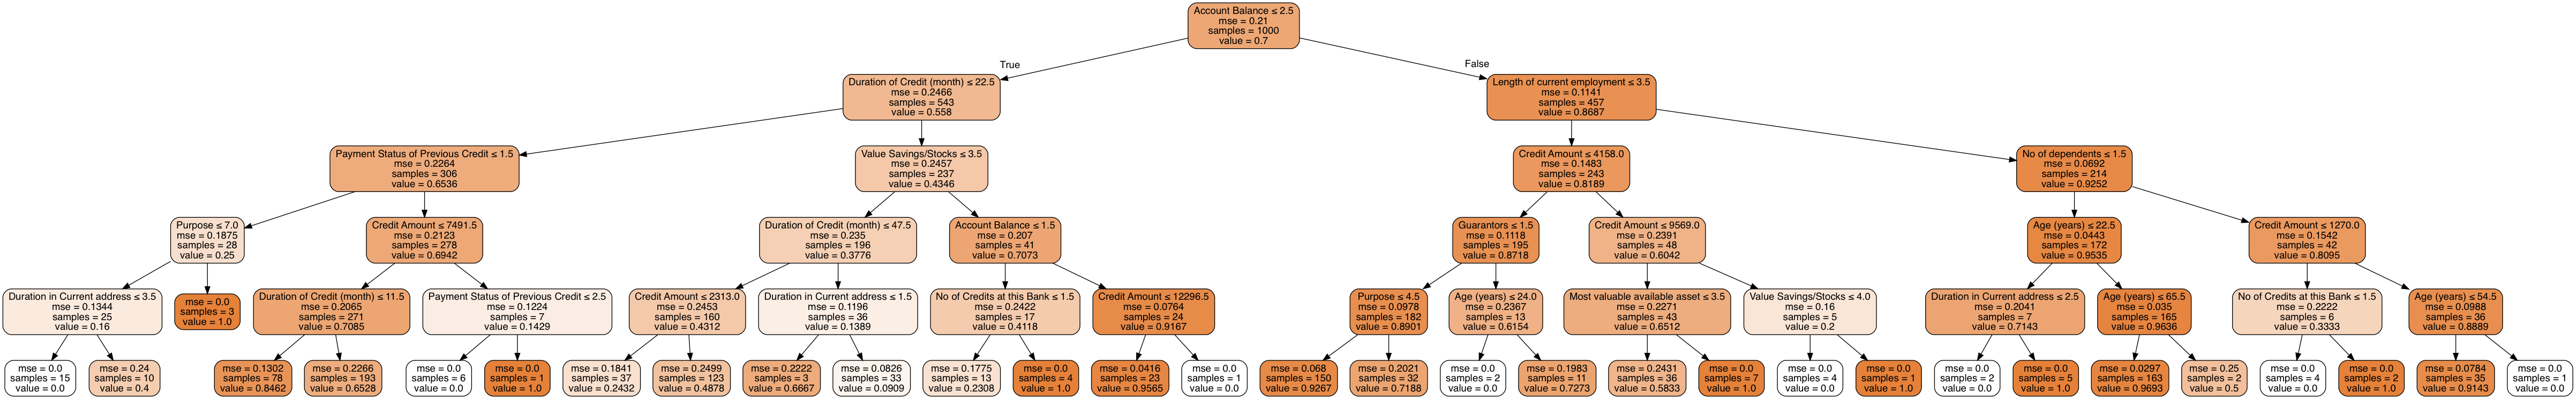

In [155]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

Как видим, данные вполне неплохо предсказывают реальность: если сбережений много, размер кредита небольшой и т.п.  увеличивается Creditability

Построим график зависимости кросс-валидации от глубины:

In [201]:
import sklearn.model_selection as ms

In [218]:
results = [ms.cross_val_score(DecisionTreeRegressor(max_depth=n), X, Y).mean() for n in range(1, 100)]

Best max_depth: 3


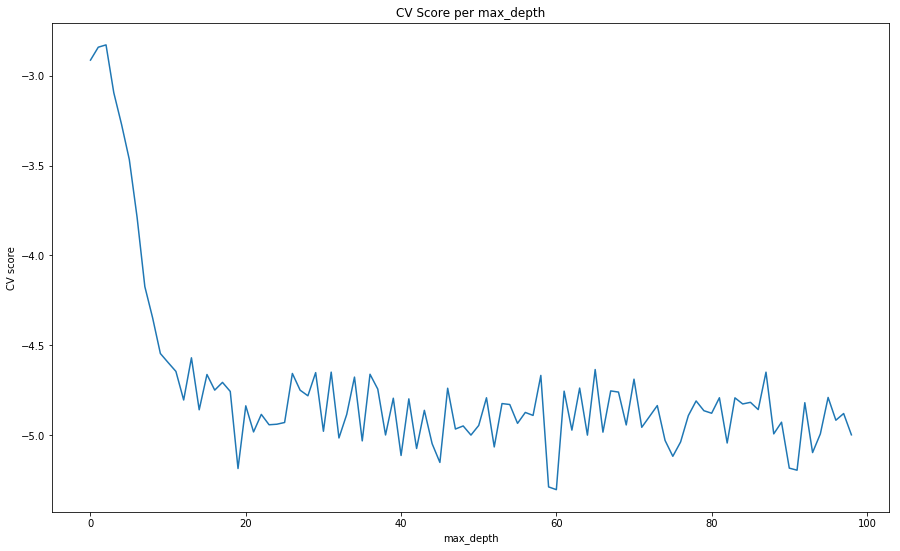

In [219]:
plt.figure(figsize=(15,9))
plt.title("CV Score per max_depth")
plt.xlabel("max_depth")
plt.ylabel("CV score")
plt.plot(results)
print("Best max_depth: %d" % (np.argmax(results) + 1))

Из графика видно, что начиная с определенного момента (тут ~17) результат кросс-валидации меняется лишь в пределах погрешности: при очень большом max_depth мы переобучаемся

Построим такой же график для всей выборки

In [220]:
from sklearn.metrics import mean_squared_error

In [221]:
results = []
for n in range(1, 100):
    estimator = DecisionTreeRegressor(max_depth=n)
    estimator.fit(X, Y)
    results = results + [mean_squared_error(estimator.predict(X), Y)]

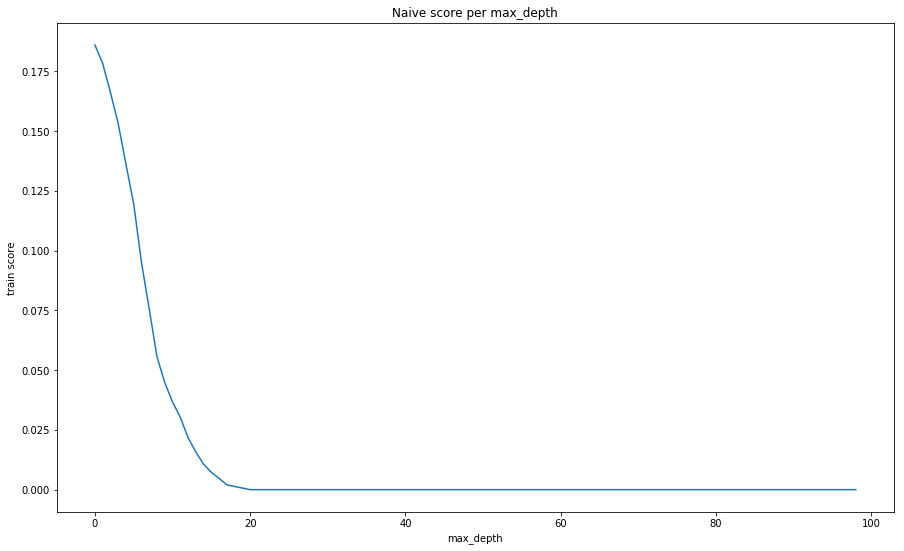

In [222]:
plt.figure(figsize=(15,9))
plt.title("Naive score per max_depth")
plt.xlabel("max_depth")
plt.ylabel("train score")
plt.plot(results)

Как видно, при max_depth > 17 мы переобучились

## Вывод.

Деревья имеют тенденцию с ростом max_depth быстро переобучаться